In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
def convolution(x, h):
    N = len(x)
    M = len(h)
    y = [0] * (N + M - 1)

    for n in range(N + M - 1):
        for k in range(N):
            if 0 <= n - k < M:
                y[n] += x[k] * h[n - k]
    return y

[3, 7, 14, 21, 13, 12]


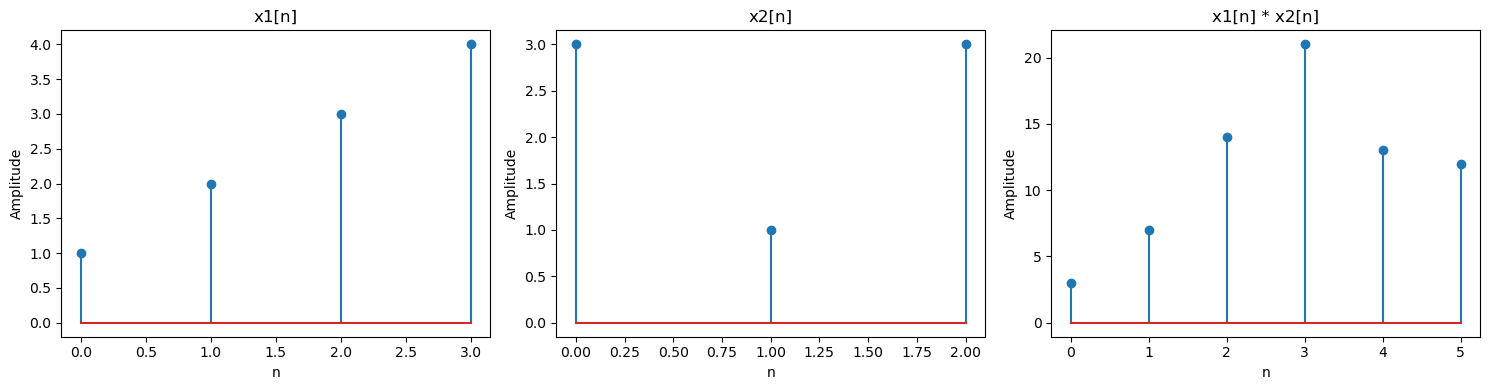

In [4]:
x1 = [1, 2, 3, 4]
x2 = [3, 1, 3]

output = convolution(x1, x2)
print(output)

n1 = np.arange(len(x1))
n2 = np.arange(len(x2))
n_out = np.arange(len(output))

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.stem(n1, x1)
plt.title('x1[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 2)
plt.stem(n2, x2)
plt.title('x2[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 3)
plt.stem(n_out, output)
plt.title('x1[n] * x2[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [5]:
def dft(x):
    N = len(x)
    X = []
    for k in range(N):
        sum_val = 0
        for n in range(N):
            sum_val += x[n] * np.exp(-2j * np.pi * k * n / N)
        X.append(sum_val)
    return np.array(X)

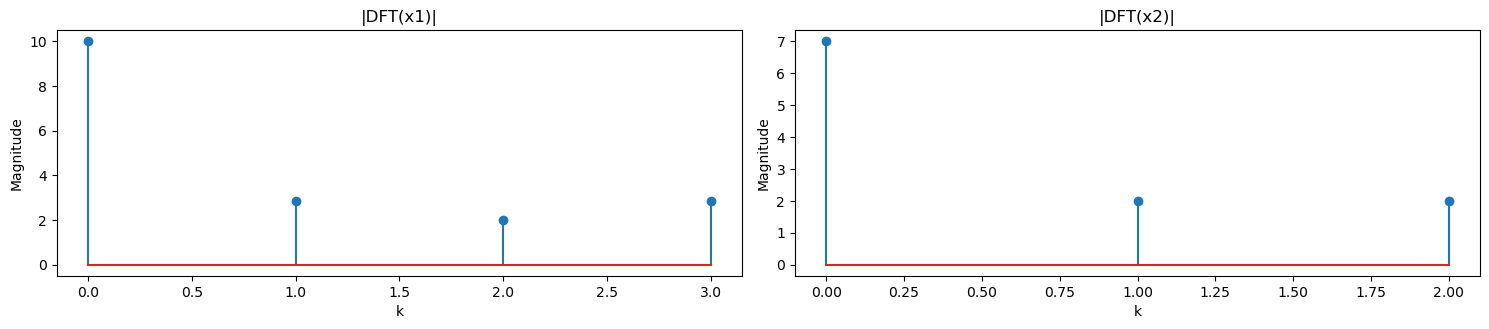

In [6]:
X1 = dft(x1)
X2 = dft(x2)

plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.stem(np.abs(X1))
plt.title('|DFT(x1)|')
plt.xlabel('k')
plt.ylabel('Magnitude')

plt.subplot(2, 2, 2)
plt.stem(np.abs(X2))
plt.title('|DFT(x2)|')
plt.xlabel('k')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

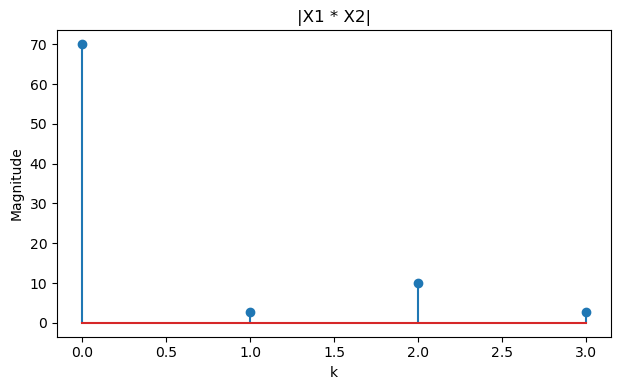

In [7]:
N = max(len(X1), len(X2))
X1_padded = np.fft.fft(x1, N)
X2_padded = np.fft.fft(x2, N)

X_mult = X1_padded * X2_padded

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.stem(np.abs(X_mult))
plt.title('|X1 * X2|')
plt.xlabel('k')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

Convolution result: [3, 7, 14, 21, 13, 12]
IDFT of multiplication: [ 3.  7. 14. 21. 13. 12.]


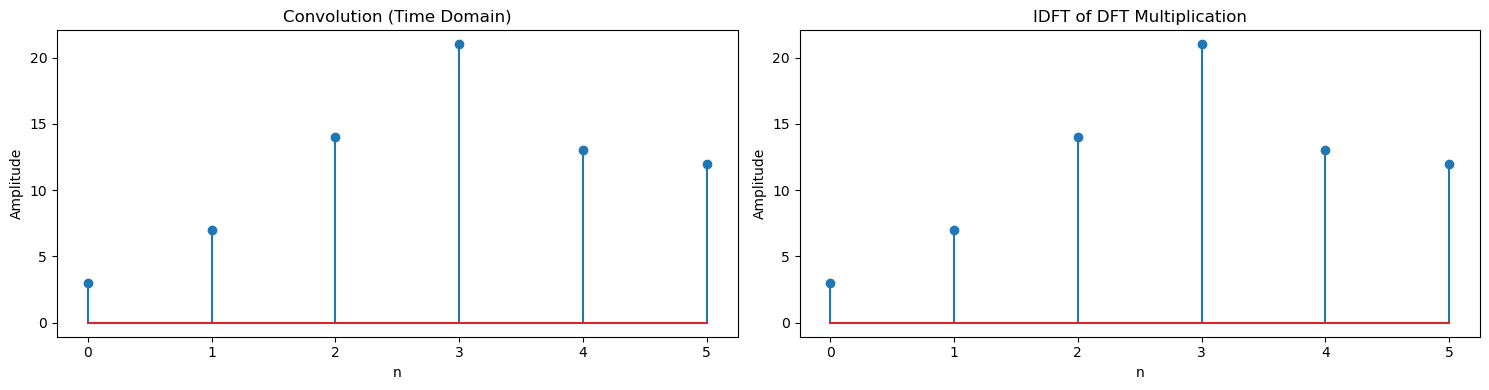

In [8]:
N_conv = len(x1) + len(x2) - 1
X1_fft = np.fft.fft(x1, N_conv)
X2_fft = np.fft.fft(x2, N_conv)
X_product = X1_fft * X2_fft
idft_result = np.fft.ifft(X_product).real

print("Convolution result:", output)
print("IDFT of multiplication:", np.round(idft_result, 4))

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.stem(output)
plt.title('Convolution (Time Domain)')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.stem(idft_result)
plt.title('IDFT of DFT Multiplication')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()